# Flipkart ecommerce dataset
<br>
Predicting Primary Category from Description.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

### Loading the dataset

In [2]:
dataset = pd.read_csv("dataset.csv")

### Understanding the basic structure of the dataset

In [3]:
dataset.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

### Dropping the extra columns

We only need 2 columns : <b>product_category_tree</b> and <b>description</b> to perform the task. <br> Therefore, we will create a copy of our dataset which have these 2 columns.

In [5]:
data = dataset.drop(["uniq_id","crawl_timestamp","product_name","product_url","pid","retail_price","discounted_price","image","is_FK_Advantage_product","product_rating","overall_rating","brand","product_specifications"],axis=1)

Now <b>data</b> is our required dataset. The structure of this is as follows: 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_tree  20000 non-null  object
 1   description            19998 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


Now we can see that the description column has 2 null values. <br> Therefore, they are not useful to us and we can remove these rows.

### Identifying the rows with NULL values and removing them

In [7]:
data[data["description"].isna()]

,product_category_tree,description
553,"[""Clothing >> Women's Clothing >> Western Wear...",NaN
17299,"[""Home Furnishing >> Cushions, Pillows & Cover...",NaN


We have row 553 and 17299 having no description so, we will delete them.

In [8]:
data = data.drop([553,17299])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_tree  19998 non-null  object
 1   description            19998 non-null  object
dtypes: object(2)
memory usage: 468.7+ KB


### Resetting the index values

After removal of two rows, the indices of our data would be inconsistent.<br>
So, we have to reset the index values for further processes.

In [10]:
data = data.reset_index()

### Converting Product Category Tree to list

Our first task is to segregate the product_category_tree and have a column for each level.<br>
To achieve this, we will first convert it into list by splitting the elements using " >> " as our separator.

In [11]:
for i in range(0,len(data)):
    data["product_category_tree"][i] = data["product_category_tree"][i][2:-2]
    data["product_category_tree"][i] = data["product_category_tree"][i].split(" >> ")

<ipython-input-11-56d8d15ebe44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["product_category_tree"][i] = data["product_category_tree"][i][2:-2]
<ipython-input-11-56d8d15ebe44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["product_category_tree"][i] = data["product_category_tree"][i].split(" >> ")


### New structure of elements of product_category_tree

In [12]:
print(data["product_category_tree"][0])
print(data["product_category_tree"][1])

['Clothing', "Women's Clothing", 'Lingerie, Sleep & Swimwear', 'Shorts', 'Alisha Shorts', "Alisha Solid Women's Cycling Shorts"]
['Furniture', 'Living Room Furniture', 'Sofa Beds & Futons', 'FabHomeDecor Fabric Double Sofa Bed (Finish Colo...']


### Maximum and Minimum number of levels in the dataset
<br>
We will check the maximum and minimum number of levels to check how many columns are required to be created to accommodate all the values of the product_category_tree.

In [13]:
print("Maximum Levels : "+ str(data.product_category_tree.map(lambda x : len(x)).max()))
print("Minimun Levels : "+ str(data.product_category_tree.map(lambda x : len(x)).min()))

Maximum Levels : 8
Minimun Levels : 1


### Creating a column for length of product_category_tree

In [14]:
data["length_category"] = data.product_category_tree.map(lambda x : len(x))

In [15]:
data.head()

,index,product_category_tree,description,length_category
0,0,"[Clothing, Women's Clothing, Lingerie, Sleep &...",Key Features of Alisha Solid Women's Cycling S...,6
1,1,"[Furniture, Living Room Furniture, Sofa Beds &...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,4
2,2,"[Footwear, Women's Footwear, Ballerinas, AW Be...",Key Features of AW Bellies Sandals Wedges Heel...,4
3,3,"[Clothing, Women's Clothing, Lingerie, Sleep &...",Key Features of Alisha Solid Women's Cycling S...,6
4,4,"[Pet Supplies, Grooming, Skin & Coat Care, Sha...",Specifications of Sicons All Purpose Arnica Do...,5


### Making individual columns for each level of category classification


This function is used to create a list of elements at a particular level. We have to give it our dataset and level number and it will return a list containing the categories for all items at that particular level.

In [16]:
def create_level(data,level_no):
    level_items = []
    for i in range(0,len(data)):
        if(len(data["product_category_tree"][i]) >= level_no):
            ele = data["product_category_tree"][i][level_no-1]
            level_items.append(ele)
        else:
            level_items.append(None)
            
    return level_items

Now we will execute this function and get the data for all the levels.

In [17]:
level1_data = create_level(data,1)
level2_data = create_level(data,2)
level3_data = create_level(data,3)
level4_data = create_level(data,4)
level5_data = create_level(data,5)
level6_data = create_level(data,6)
level7_data = create_level(data,7)
level8_data = create_level(data,8)

Now, we will create separate columns in our dataset to present category at each level.

In [18]:
data["level1"] = level1_data
data["level2"] = level2_data
data["level3"] = level3_data
data["level4"] = level4_data
data["level5"] = level5_data
data["level6"] = level6_data
data["level7"] = level7_data
data["level8"] = level8_data


### Final Structure of our dataset

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  19998 non-null  int64 
 1   product_category_tree  19998 non-null  object
 2   description            19998 non-null  object
 3   length_category        19998 non-null  int64 
 4   level1                 19998 non-null  object
 5   level2                 19670 non-null  object
 6   level3                 18541 non-null  object
 7   level4                 14123 non-null  object
 8   level5                 9357 non-null   object
 9   level6                 4447 non-null   object
 10  level7                 808 non-null    object
 11  level8                 30 non-null     object
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


In [20]:
data.head()

,index,product_category_tree,description,length_category,level1,level2,level3,level4,level5,level6,level7,level8
0,0,"[Clothing, Women's Clothing, Lingerie, Sleep &...",Key Features of Alisha Solid Women's Cycling S...,6,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
1,1,"[Furniture, Living Room Furniture, Sofa Beds &...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,4,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None,None,None
2,2,"[Footwear, Women's Footwear, Ballerinas, AW Be...",Key Features of AW Bellies Sandals Wedges Heel...,4,Footwear,Women's Footwear,Ballerinas,AW Bellies,None,None,None,None
3,3,"[Clothing, Women's Clothing, Lingerie, Sleep &...",Key Features of Alisha Solid Women's Cycling S...,6,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
4,4,"[Pet Supplies, Grooming, Skin & Coat Care, Sha...",Specifications of Sicons All Purpose Arnica Do...,5,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Sicons All Purpose Arnica Dog Shampoo (500 ml),None,None,None


### Visualizing number of levels for various products

In [21]:
count_of_items = list(data["length_category"].value_counts(sort=False))
levels = list(["1 level","2 levels","3 levels","4 levels","5 levels","6 levels","7 levels","8 levels"])

In [22]:
plt.style.use("seaborn")

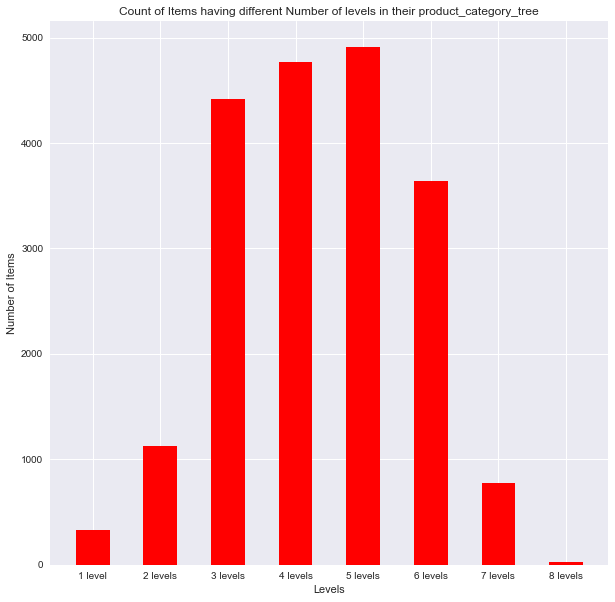

In [23]:
fig = plt.figure(figsize = (10, 10))
plt.bar(levels, count_of_items, color ='red',width = 0.5)
plt.xlabel("Levels")
plt.ylabel("Number of Items")
plt.title("Count of Items having different Number of levels in their product_category_tree")
plt.show()

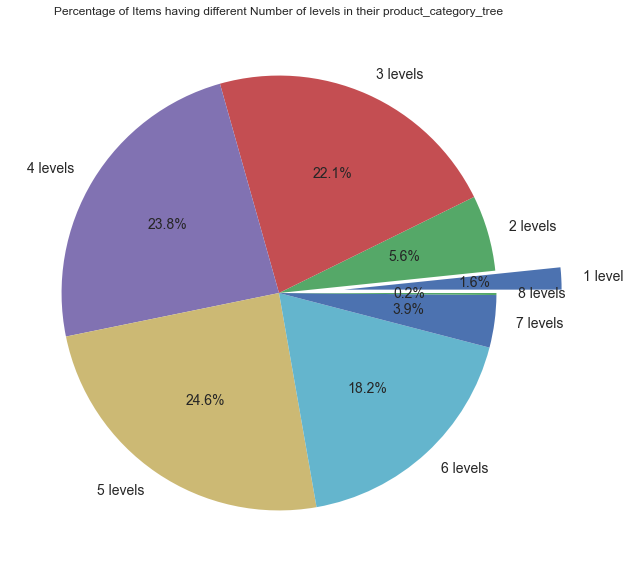

In [24]:
fig = plt.figure(figsize =(10, 10))
plt.pie(count_of_items, labels = levels,textprops = {'fontsize': 14},autopct='%1.1f%%',explode=(0.3,0,0,0,0,0,0,0))

plt.title("Percentage of Items having different Number of levels in their product_category_tree")
plt.show()

### Visualizing unique categories at each level

In [25]:
list_unique_categories = []
c = 0
for i in range(0,8):
    c = len(pd.unique(data["level" + str(i + 1)]))
    list_unique_categories.append(c)    

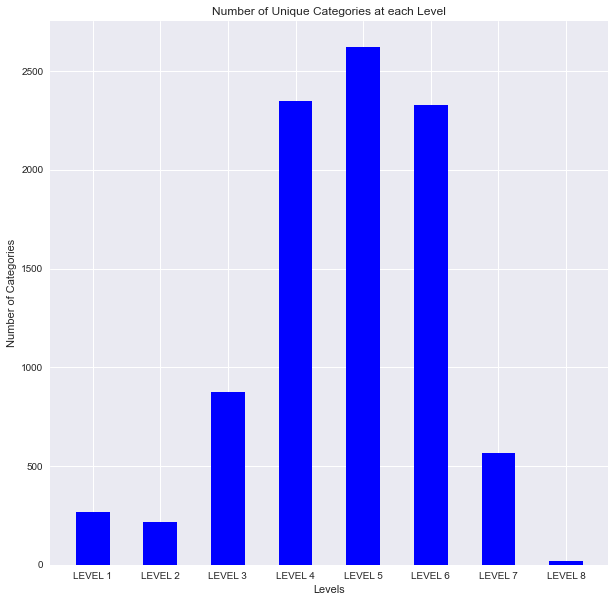

In [26]:
level_no = ["LEVEL 1","LEVEL 2","LEVEL 3","LEVEL 4","LEVEL 5","LEVEL 6","LEVEL 7","LEVEL 8"]

fig = plt.figure(figsize = (10, 10))

plt.bar(level_no, list_unique_categories, color = 'blue',width = 0.5)

plt.xlabel("Levels")
plt.ylabel("Number of Categories")
plt.title("Number of Unique Categories at each Level")

plt.show()

#### Total unique categories across all levels are:

In [27]:
total_unique_categories = np.sum(list_unique_categories)

In [28]:
print(total_unique_categories)

9245


### Printing some items which have a single level

In [29]:
data[data["length_category"] == 1][:5]

,index,product_category_tree,description,length_category,level1,level2,level3,level4,level5,level6,level7,level8
5,5,[Eternal Gandhi Super Series Crystal Paper Wei...,Key Features of Eternal Gandhi Super Series Cr...,1,Eternal Gandhi Super Series Crystal Paper Weig...,None,None,None,None,None,None,None
30,30,[Bengal Blooms Rose Artificial Plant with Pot...,Key Features of Bengal Blooms Rose Artificial ...,1,Bengal Blooms Rose Artificial Plant with Pot ...,None,None,None,None,None,None,None
44,44,[Vishudh Printed Women's Straight Kurta],Specifications of Vishudh Printed Women's Stra...,1,Vishudh Printed Women's Straight Kurta,None,None,None,None,None,None,None
45,45,[Vishudh Printed Women's Straight Kurta],Specifications of Vishudh Printed Women's Stra...,1,Vishudh Printed Women's Straight Kurta,None,None,None,None,None,None,None
46,46,[Vishudh Printed Women's Anarkali Kurta],Specifications of Vishudh Printed Women's Anar...,1,Vishudh Printed Women's Anarkali Kurta,None,None,None,None,None,None,None


In [30]:
data[data["length_category"] == 1][-5:]

,index,product_category_tree,description,length_category,level1,level2,level3,level4,level5,level6,level7,level8
19419,19421,[Pazel Slim Fit Men's Jeans],Key Features of Pazel Slim Fit Men's Jeans Col...,1,Pazel Slim Fit Men's Jeans,None,None,None,None,None,None,None
19429,19431,[SMART TRADERS Girls Bellies],Key Features of SMART TRADERS Girls Bellies Oc...,1,SMART TRADERS Girls Bellies,None,None,None,None,None,None,None
19432,19434,[Corcepts Universal Tablet HD Ultra Clear Tran...,Key Features of Corcepts Universal Tablet HD U...,1,Corcepts Universal Tablet HD Ultra Clear Trans...,None,None,None,None,None,None,None
19433,19435,"[Areon Luxurious Fragrance Long Lasting Car,Ho...",Key Features of Areon Luxurious Fragrance Long...,1,"Areon Luxurious Fragrance Long Lasting Car,Hom...",None,None,None,None,None,None,None
19434,19436,[Corcepts Universal Tablet HD Ultra Clear Tran...,Key Features of Corcepts Universal Tablet HD U...,1,Corcepts Universal Tablet HD Ultra Clear Trans...,None,None,None,None,None,None,None


#### From the above 2 cells we can observe that, the data items which contain level 1 only are very specific in nature, thus they cannot be the primary category.
<br>
<li> Therefore, we will remove those items which only have a single level of categorization. </li>
<li> They form just <b> 1.2% </b> of the whole dataset, thus removing them will not affect our dataset significantly. </li>

### Filtering out rows with data [ "length_category " ] == 1

In [31]:
data_new = data[data["length_category"] > 1]

### Structure of Dataset after removing products with only 1 level of classification

In [32]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19670 entries, 0 to 19997
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  19670 non-null  int64 
 1   product_category_tree  19670 non-null  object
 2   description            19670 non-null  object
 3   length_category        19670 non-null  int64 
 4   level1                 19670 non-null  object
 5   level2                 19670 non-null  object
 6   level3                 18541 non-null  object
 7   level4                 14123 non-null  object
 8   level5                 9357 non-null   object
 9   level6                 4447 non-null   object
 10  level7                 808 non-null    object
 11  level8                 30 non-null     object
dtypes: int64(2), object(10)
memory usage: 2.0+ MB


### Resetting the index values

After removal of some rows, the indices of our data would be inconsistent.<br>
So, we have to reset the index values for further processes.

In [33]:
data_new = data_new.reset_index()

## Data Cleaning
<br>
Before training the model, we need to convert the text given in description into numerical values so that it could be processed by the model. But before doing this we need to clean this data and make it consistent so that our model does not learn unnecessary and repetitive values.
<br><br>
We have to perform the following operations to clean our data:
<br><br>
<li>Remove the numerical values and special character. This can be done using Regular Expression Tokenizer.</li>
<li>Convert all the data into lowercase.</li>
<li>Remove all the stopwords (such as the, he, have).</li>
<li>Stemming all the words ie. converting the words into their root form. For example: eating, eats, eaten will be converted to eat.</li>

In [34]:
tokenizer=RegexpTokenizer(r'[a-z]+')
ps=PorterStemmer()
eng_stopwords=set(stopwords.words("english"))

### The function getCleanedItem() will clean the text given in description.

In [35]:
def getCleanedItem(item):
    item=str(item)
    item=item.lower()
    tokens=tokenizer.tokenize(item)
    new_token=[token for token in tokens if token not in eng_stopwords]
    stemmed_token=[ps.stem(token) for token in new_token]
    clean_item=" ".join(stemmed_token)
    #print(item)
    return clean_item

#### The loop given below traverses through the "description" column and cleans the data.

In [36]:
for i in range(0,len(data_new)):
    data_new["description"][i]=getCleanedItem(data_new["description"][i])

<ipython-input-36-4d453f60bb72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["description"][i]=getCleanedItem(data_new["description"][i])


In [37]:
data_new.head()

,level_0,index,product_category_tree,description,length_category,level1,level2,level3,level4,level5,level6,level7,level8
0,0,0,"[Clothing, Women's Clothing, Lingerie, Sleep &...",key featur alisha solid women cycl short cotto...,6,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
1,1,1,"[Furniture, Living Room Furniture, Sofa Beds &...",fabhomedecor fabric doubl sofa bed finish colo...,4,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None,None,None
2,2,2,"[Footwear, Women's Footwear, Ballerinas, AW Be...",key featur aw belli sandal wedg heel casual aw...,4,Footwear,Women's Footwear,Ballerinas,AW Bellies,None,None,None,None
3,3,3,"[Clothing, Women's Clothing, Lingerie, Sleep &...",key featur alisha solid women cycl short cotto...,6,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None
4,4,4,"[Pet Supplies, Grooming, Skin & Coat Care, Sha...",specif sicon purpos arnica dog shampoo ml gene...,5,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Sicons All Purpose Arnica Dog Shampoo (500 ml),None,None,None


# Figuring out the primary category

#### Unique categories from the complete product_category_tree 

In [38]:
print(len(pd.unique(dataset["product_category_tree"])))

6466


# First Approach
<br>
Now if we would have considered the whole product_category_tree as our primary category, we would get <b>6466</b> categories for our model to choose an output from. This method is very naive and cannot be used in real-life scenarios because in reality, the end product is always different and thus no two items will ever have the same product_category_tree.

# Second Approach
<br>
Consider level 1 of all the products as the primary category.


#### Displaying the unique values at Level 1

In [39]:
print(pd.unique(data_new["level1"]))

['Clothing' 'Furniture' 'Footwear' 'Pet Supplies' 'Pens & Stationery'
 'Sports & Fitness' 'Beauty and Personal Care' 'Bags, Wallets & Belts'
 'Home Decor & Festive Needs' 'Automotive' 'Tools & Hardware'
 'Home Furnishing' 'Baby Care' 'Mobiles & Accessories' 'Food & Nutrition'
 'Watches' 'Toys & School Supplies' 'Jewellery' 'Kitchen & Dining'
 'Home & Kitchen' 'Computers' 'Cameras & Accessories'
 'Health & Personal Care Appliances' 'Gaming' 'Home Improvement'
 'Automation & Robotics' 'Sunglasses' 'Home Entertainment'
 'Wearable Smart Devices' 'Eyewear' 'eBooks' 'Household Supplies']


#### Displaying the count of unique level 1 categories

In [40]:
print(len(pd.unique(data_new["level1"])))

32


### Why is second approach not suitable?
<br>
Although this approach reduces the number of unique categories, it is not good enough as it still does not gives us the exact primary category for a particular item.
<br><br>
Let us consider an example....
<br><br>
Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts
<br><br>
Now for this item, the primary category should be <b>shorts</b> as the item <b>Alisha Solid Women's Cycling Shorts</b> is a specific kind of shorts.


#### Thus, it is not necessary that the level 1 category is the primary category.

# Third Approach

#### Let us visualize some data first.

### Catergories in level 1 

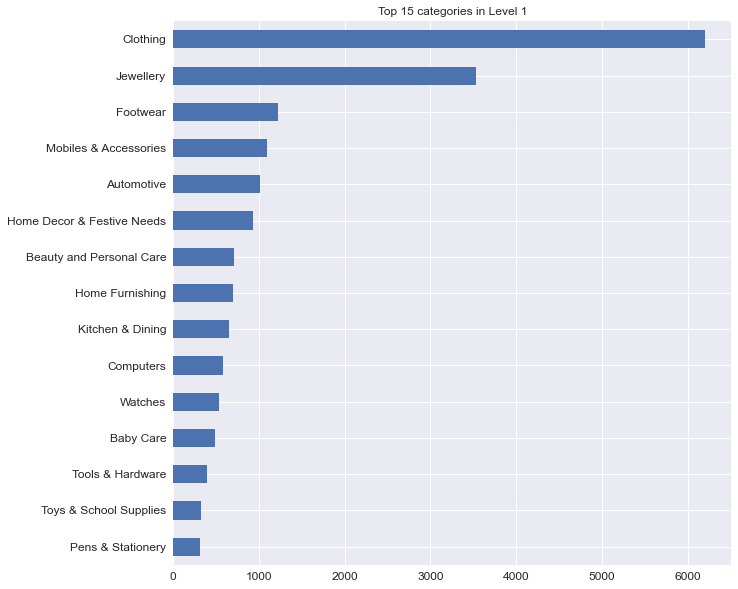

In [41]:
plt.figure(figsize=(10,10))
data_new['level1'].value_counts()[:15].sort_values(ascending=True).plot(kind='barh')
plt.title("Top 15 categories in Level 1")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

From the above graph we can observe that some categories in level 1 are very general and cannot be termed as the primary category for a particular product.
<br><br>
Let us take the example of Clothing, it consitutes a large part of the whole data and has a variety of sub-categories which can be considered as the primary category. Thus, we need to go inside the product_category_tree for categories which are very general.

### Function to find further categorization of items with specific upper levels

In [42]:
def give_number(upper_level,level_item,lower_level):
    g=[]
    for i in range(0,len(data_new)):
        if data_new[upper_level][i]==level_item:
            g.append(data_new[lower_level][i])

    freq = {}
    for items in g:
        freq[items] = g.count(items)
        
    for key, value in freq.items():
        print ("% s : % d"%(key, value))
    

#### Level 1 = "Clothing" have the following sub-categories at  Level 2

In [43]:
give_number("level1","Clothing","level2")

Women's Clothing :  3900
Kids' Clothing :  520
Men's Clothing :  1773
fourgee Clothing :  1
piftif Clothing :  1
Clovia Clothing :  1
Sonpra Clothing :  1


####  Level 1 = "Clothing" and Level 2 = "Women's Clothing" have the following sub-categories at Level 3

In [44]:
give_number("level2","Women's Clothing","level3")

Lingerie, Sleep & Swimwear :  1208
Sports & Gym Wear :  49
Fusion Wear :  73
Ethnic Wear :  468
Formal Wear :  19
Western Wear :  1980
Accessories :  17
Winter & Seasonal Wear :  32
Maternity Wear :  21
Starsy Women's Clothing :  1
fourgee Women's Clothing :  1
Viral Girl Women's Clothing :  1
Clovia Women's Clothing :  1
DOLZ Women's Clothing :  1
TIMBERLAKE Women's Clothing :  1
Leggings & Jeggings :  22
Combo Sets :  5


####  Level 1 = "Clothing" and Level 2 = "Men's Clothing" have the following sub-categories at  Level 3

In [45]:
give_number("level2","Men's Clothing","level3")

Cargos, Shorts & 3/4ths :  21
Winter & Seasonal Wear :  193
Shirts :  234
Jeans :  65
Accessories & Combo Sets :  135
Navaksha Men's Clothing :  32
Posto Men's Clothing :  1
Elite Neckties Men's Clothing :  1
Sports Wear :  26
Jewlook Men's Clothing :  1
Suits & Blazers :  32
T-Shirts :  903
Ethnic Wear :  17
Trousers :  35
Inner Wear & Sleep Wear :  75
Fabrics :  2


#### From the above data, we can observe that some categories which are having a large number of items in them can be further divided into sub-parts and one of those sub-parts could be the primary category.

### Creating a dictionary to store frequency of all the categories across all levels.
This would help to find the primary category. 

In [46]:
dict_num={}
for i in range(0,len(data_new)):
    for j in range(data_new["length_category"][i]):
        category = data_new['level'+str(j+1)][i]
        if category in dict_num:
            dict_num[category]+=1

        else:
            dict_num[category]=1

## Finding the primary category according to third approach:
<br>
<ol>
<li> Set a threshold percentage value.</li>
<li> Check if we have reached the last element in product_category_tree.</li>
<li> If yes, set the previous level as the primary category.</li>
<li> If no, go further in the tree to check if the number of items (n) are more than the threshold percentage of total items (th).</li>
<li> n < th : set the primary category to current level.</li>
<li> n > th : go further in the product_category_tree.</li>
</ol>   



In [47]:
primary_category=[]
threashold_percentage=0.3
total=len(data_new)
for i in range(0,len(data_new)):
    level1_ele=data_new["level1"][i]
    n1=dict_num[level1_ele]
    #print(n1,total*threashold_percentage)
    #level1 analysis
    if n1 < (total*threashold_percentage) or data_new["length_category"][i]==1:
        primary_category.append(data_new["level1"][i])
    else:
        level2_ele=data_new["level2"][i]
        n2=dict_num[level2_ele]
        threashold2 = int(n1*threashold_percentage)
        #level2 analysis
        if data_new["length_category"][i]==2:
            primary_category.append(data_new["level1"][i])
        elif n2 < threashold2 :
            primary_category.append(data_new["level2"][i])
        else:
            level3_ele=data_new["level3"][i]
            n3=dict_num[level3_ele]
            threashold3 = int(n2*threashold_percentage)
            #level3 analysis
            if data_new["length_category"][i]==3:
                primary_category.append(data_new["level2"][i])
            elif n3 < threashold3 :
                primary_category.append(data_new["level3"][i])
            else:
                level4_ele=data_new["level4"][i]
                n4=dict_num[level4_ele]
                threashold4 = int(n3*threashold_percentage)
                #level4 analysis
                if data_new["length_category"][i]==4:
                    primary_category.append(data_new["level3"][i])
                elif n4 < threashold4 :
                    primary_category.append(data_new["level4"][i])
                else:
                    level5_ele=data_new["level5"][i]
                    n5=dict_num[level5_ele]
                    threashold5 = int(n5*threashold_percentage)
                    #level5 analysis
                    if data_new["length_category"][i]==5:
                        primary_category.append(data_new["level4"][i])
                    elif n5 < threashold5 :
                        primary_category.append(data_new["level5"][i])
                    else:
                        primary_category.append(data_new["level5"][i])

### Printing the unique values from primary category

In [48]:
new_set=set(primary_category)
print(len(new_set))

93


### Creating a new column in our dataset for primary category

In [49]:
data_new["PC"]=primary_category

In [50]:
data_new.head(n=5)

,level_0,index,product_category_tree,description,length_category,level1,level2,level3,level4,level5,level6,level7,level8,PC
0,0,0,"[Clothing, Women's Clothing, Lingerie, Sleep &...",key featur alisha solid women cycl short cotto...,6,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None,Shorts
1,1,1,"[Furniture, Living Room Furniture, Sofa Beds &...",fabhomedecor fabric doubl sofa bed finish colo...,4,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None,None,None,Furniture
2,2,2,"[Footwear, Women's Footwear, Ballerinas, AW Be...",key featur aw belli sandal wedg heel casual aw...,4,Footwear,Women's Footwear,Ballerinas,AW Bellies,None,None,None,None,Footwear
3,3,3,"[Clothing, Women's Clothing, Lingerie, Sleep &...",key featur alisha solid women cycl short cotto...,6,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,Alisha Solid Women's Cycling Shorts,None,None,Shorts
4,4,4,"[Pet Supplies, Grooming, Skin & Coat Care, Sha...",specif sicon purpos arnica dog shampoo ml gene...,5,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,Sicons All Purpose Arnica Dog Shampoo (500 ml),None,None,None,Pet Supplies


# Preprocessing the data for training

#### We have to label the primary category for training. We will use LabelEncoder() for this.

In [51]:
pc=list(data_new["PC"])

label_encoder = preprocessing.LabelEncoder()
label = label_encoder.fit_transform(pc)

#### For preprocessing the text in description, we have to do vectorization.
Vectorization is the encoding of words as integers, or floating-point values, for use as inputs the algorithms. <br> 
We will use <b>CountVectorizer</b> for this purpose. It will convert our collection of text descriptions to a vector of term/token counts.

In [52]:
l=list(data_new["description"])

cv=CountVectorizer()
x_vec=cv.fit_transform(l)

### Train-Test Split

We will split our data into 2 parts : training set and testing set.

#### Train-Test Set 1 ( 80%-Training Data, 20% - Testing Data )

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x_vec,label,test_size=0.2,random_state=42)

#### Train-Test Set 2 ( 70%-Training Data, 30% - Testing Data )

In [54]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x_vec,label,test_size=0.3,random_state=10)

# Training various machine learning models

## 1. Naive Bayes Classifier

### Training the model on Train-Test Set 1.

In [55]:
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [75]:
pred = mnb.predict(xtest)
acc1 = metrics.accuracy_score(ytest, pred)
print("ACCURACY OF THE MODEL: ", acc1*100)

ACCURACY OF THE MODEL:  89.27300457549568


### Training the model on Train-Test Set 2.

In [57]:
mnb2 = MultinomialNB()
mnb2.fit(xtrain2,ytrain2)

MultinomialNB()

In [76]:
pred2 = mnb2.predict(xtest2)
acc21 = metrics.accuracy_score(ytest2, pred2)
print("ACCURACY OF THE MODEL: ", acc21*100)

ACCURACY OF THE MODEL:  87.51059142518217


## 2.  SVM

### Training the model on Train-Test Set 1.

#### Linear SVM

In [59]:
svc1 = svm.SVC(kernel='linear',C=1.0)
svc1.fit(xtrain,ytrain)

SVC(kernel='linear')

In [60]:
acc2 = svc1.score(xtest, ytest)
print("ACCURACY OF THE MODEL: ", acc2*100)

ACCURACY OF THE MODEL:  96.18708693441789


#### Gaussian SVM

In [61]:
svc=svm.SVC(kernel='rbf',C=10)
svc.fit(xtrain,ytrain)

SVC(C=10)

In [77]:
acc3 = svc.score(xtest, ytest)
print("ACCURACY OF THE MODEL: ", acc3*100)

ACCURACY OF THE MODEL:  95.01779359430606


### Training the model on Train-Test Set 2.

#### Linear SVM

In [63]:
svc21 = svm.SVC(kernel='linear',C=1.0)
svc21.fit(xtrain2,ytrain2)

SVC(kernel='linear')

In [78]:
acc22 = svc21.score(xtest2, ytest2)
print("ACCURACY OF THE MODEL: ", acc22*100)

ACCURACY OF THE MODEL:  95.9667852906287


#### Gaussian SVM

In [65]:
svc22=svm.SVC(kernel='rbf',C=10)
svc22.fit(xtrain2,ytrain2)

SVC(C=10)

In [79]:
acc23 = svc22.score(xtest2, ytest2)
print("ACCURACY OF THE MODEL: ", acc23*100)

ACCURACY OF THE MODEL:  94.59413658701915


## 3. Random Forest Classifier

### Training the model on Train-Test Set 1.

In [67]:
clf = RandomForestClassifier(n_estimators = 50)  
clf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [80]:
y_pred = clf.predict(xtest)
acc4 = metrics.accuracy_score(ytest, y_pred)
print("ACCURACY OF THE MODEL: ", acc4*100)

ACCURACY OF THE MODEL:  95.22114895780376


### Training the model on Train-Test Set 2.

In [69]:
clf2 = RandomForestClassifier(n_estimators = 50)  
clf2.fit(xtrain2, ytrain2)

RandomForestClassifier(n_estimators=50)

In [81]:
y_pred2 = clf2.predict(xtest2)
acc24 = metrics.accuracy_score(ytest2, y_pred2)
print("ACCURACY OF THE MODEL: ", acc24*100)

ACCURACY OF THE MODEL:  95.2719877986782


## Comparing the accuracy of various models ( SET 1 )

In [71]:
acc=[acc1*100,acc2*100,acc3*100,acc4*100]
model=["Naive Bayes", "Linear SVM", "Gaussian SVM", "Random Forest"]

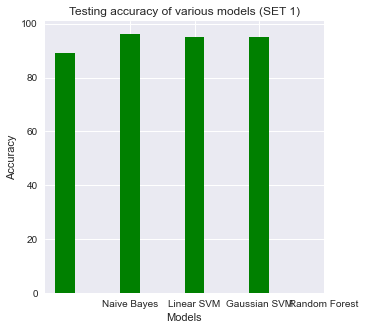

In [72]:
fig = plt.figure(figsize = (5, 5))
plt.bar(model, acc, color ='green',width = 0.3)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks((1, 2, 3, 4), ("Naive Bayes", "Linear SVM", "Gaussian SVM", "Random Forest"))
plt.title("Testing accuracy of various models (SET 1)")
plt.show()

### Thus, we can see that both SVM and Random Forest Classifier gave approximately 95% accuracy.

## Comparing the accuracy of various models across Train- Test SET 1 and 2

In [73]:
acc_t2=[acc21*100,acc22*100,acc23*100,acc24*100]
model=np.array([1,2,3,4])
acct1=np.array(acc)
acct2=np.array(acc_t2)

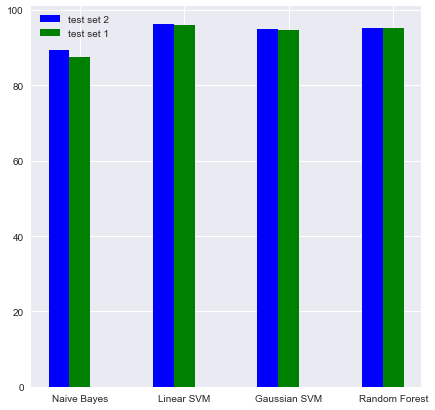

In [74]:
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)
ax.bar(model-0.2, acct1, width=0.2, color='b', align='center',label="test set 2")
ax.bar(model, acct2, width=0.2, color='g', align='center',label="test set 1")
plt.xticks((1, 2, 3, 4), ("Naive Bayes", "Linear SVM", "Gaussian SVM", "Random Forest"))
plt.legend()
plt.show()

### Thus, our models gave comparable accuracies when trained and tested on different Train-Test Sets.